In [3]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
df = pd.read_csv("/content/drive/MyDrive/possum.csv")

In [66]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [67]:
df_nans_dropped = df.dropna()
df_nans_filled = df.fillna(df.mean())

<ipython-input-67-5f0a9cb6f1f7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_nans_filled = df.fillna(df.mean())


In [68]:
df_x = df_nans_filled.drop(labels=["case", "site", "Pop","age"], axis=1)
df_y = df_nans_filled[['age']]

In [69]:
df_x.head()

,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,m,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,f,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,f,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,f,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,f,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [71]:
df_x['sex'] = df_x['sex'].replace({'f': 1, 'm': 0})

In [72]:
df_x.head()

,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_nrm = scaler.fit_transform(df_x)

In [178]:
from sklearn.model_selection import train_test_split
df_x_train, df_x_test, y_train, y_test = train_test_split(x_nrm, df_y.values.reshape((-1, )), train_size=0.75)

print(df_x_train.shape, y_train.shape, df_x_test.shape, y_test.shape)

(78, 10) (78,) (26, 10) (26,)


In [179]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='tanh', input_shape=df_x_train.shape[1:]))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

# model.add(Dense(32, activation='relu'))

model.add(Dense(1, 'linear'))

In [180]:
model.compile(optimizer='adam', loss="mae", metrics="mse")

In [181]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 64)                704       
                                                                 
 dense_50 (Dense)            (None, 64)                4160      
                                                                 
 dense_51 (Dense)            (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________


In [182]:
results = model.fit(
    df_x_train, y_train, epochs=15,
    validation_data=(df_x_test, y_test), batch_size=5)

Epoch 1/15
16/16 [==============================] - 1s 20ms/step - loss: 3.9120 - mse: 19.1010 - val_loss: 3.1824 - val_mse: 14.5216
Epoch 2/15
16/16 [==============================] - 0s 6ms/step - loss: 3.0875 - mse: 12.9677 - val_loss: 2.5830 - val_mse: 10.0324
Epoch 3/15
16/16 [==============================] - 0s 6ms/step - loss: 2.3125 - mse: 8.1206 - val_loss: 2.0863 - val_mse: 6.4545
Epoch 4/15
16/16 [==============================] - 0s 5ms/step - loss: 1.6676 - mse: 4.8248 - val_loss: 1.8062 - val_mse: 4.7369
Epoch 5/15
16/16 [==============================] - 0s 7ms/step - loss: 1.4803 - mse: 3.5530 - val_loss: 1.7037 - val_mse: 4.0739
Epoch 6/15
16/16 [==============================] - 0s 6ms/step - loss: 1.4113 - mse: 3.3027 - val_loss: 1.6430 - val_mse: 3.8041
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 1.3048 - mse: 2.9076 - val_loss: 1.6050 - val_mse: 3.7842
Epoch 8/15
16/16 [==============================] - 0s 5ms/step - loss: 1.2301 - mse:

In [183]:
yhat_test = model.predict(df_x_test)

1/1 [==============================] - 0s 64ms/step


In [184]:
import matplotlib.pyplot as plt

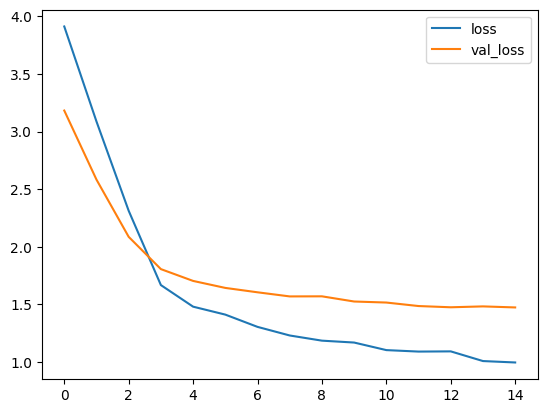

In [185]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.legend()

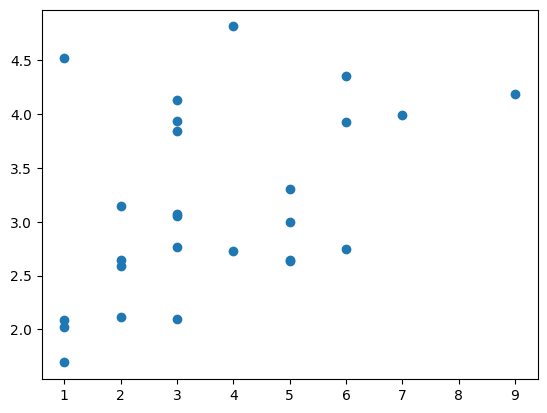

In [186]:
plt.scatter(y_test, yhat_test)